In [1]:
# Decision Tree : DT

# DT-Classifier

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
from sklearn.datasets import load_iris

iris = load_iris()

X = pd.DataFrame(iris['data'],columns=['sepal length','sepal width','petal length','petal width'])
y = iris['target']

In [26]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [32]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=2)

dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

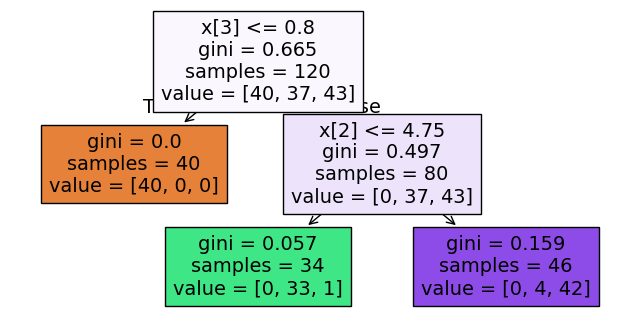

In [34]:
import sklearn.tree as tree

plt.figure(figsize=(8,4))
tree.plot_tree(dtc,filled=True)
plt.show()

In [35]:
y_pred = dtc.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print(accuracy_score(y_test,y_pred))

print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

0.9333333333333333
[[10  0  0]
 [ 0 11  2]
 [ 0  0  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.85      0.92        13
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.95      0.93        30
weighted avg       0.95      0.93      0.93        30



In [37]:
# Pre-Prunning 
# hyperparam tuning

param = {
    'criterion':['gini','entropy','log_loss'],
    'splitter' :['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}

In [48]:
import warnings
warnings.filterwarnings('ignore')

In [49]:
from sklearn.model_selection import GridSearchCV

model = GridSearchCV(dtc,param_grid=param,cv=5,scoring='accuracy')

model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=2),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [50]:
model.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'random'}

In [51]:
model.best_score_

np.float64(0.9583333333333334)

In [52]:
y_pred = model.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print(accuracy_score(y_test,y_pred))

print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

0.9666666666666667
[[10  0  0]
 [ 0 13  0]
 [ 0  1  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.93      1.00      0.96        13
           2       1.00      0.86      0.92         7

    accuracy                           0.97        30
   macro avg       0.98      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30

